In [1]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

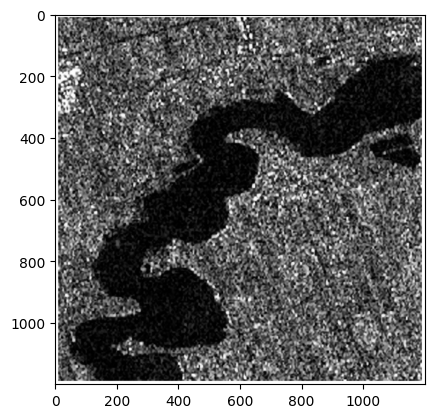

In [3]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [4]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

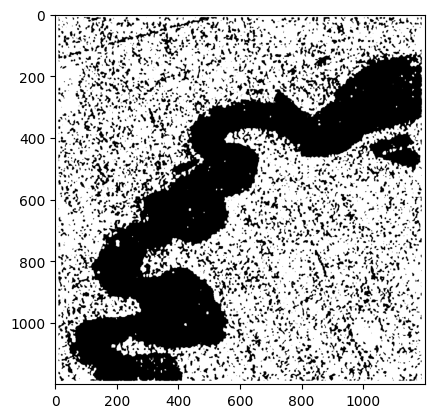

In [5]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [6]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

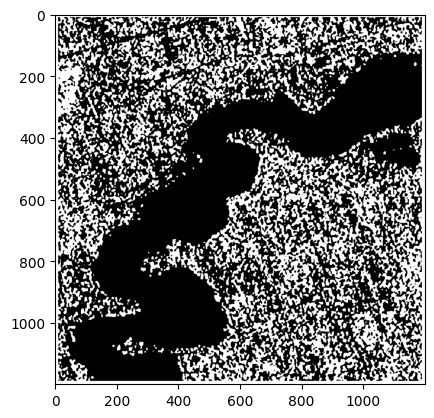

In [7]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [8]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


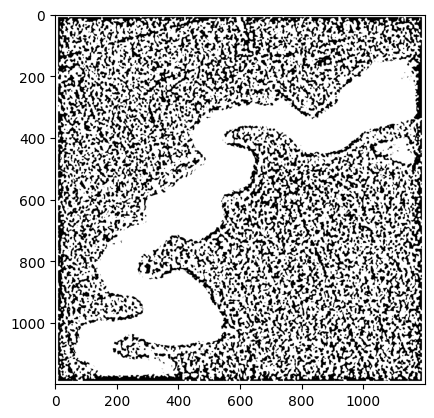

In [9]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [10]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

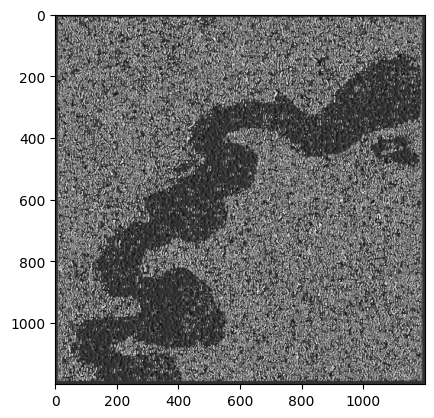

In [11]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

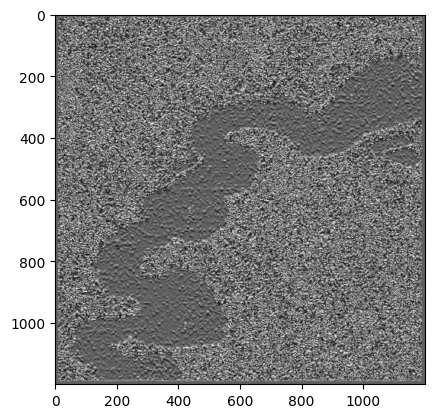

In [12]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [13]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

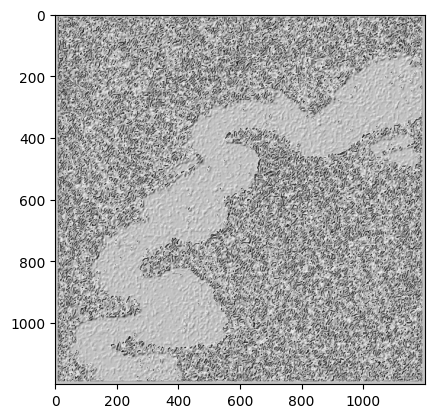

In [14]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [15]:
edges = cv2.Canny(image_gray,100,200)

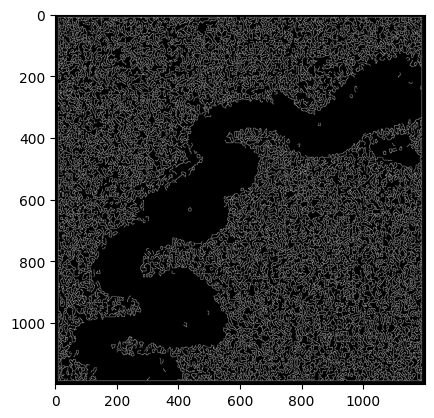

In [16]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [17]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

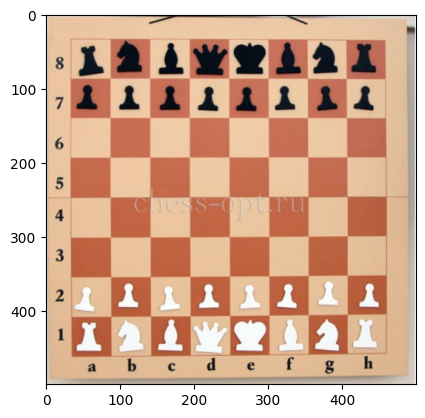

In [18]:
plt.imshow(image)

In [19]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [20]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [21]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

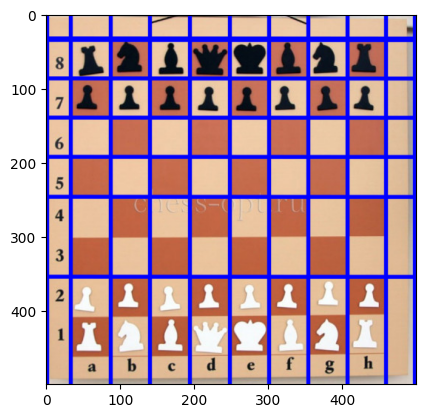

In [22]:
plt.imshow(image)

In [23]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [24]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
eq_gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [25]:
# точечная бинаризация

In [26]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 40
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

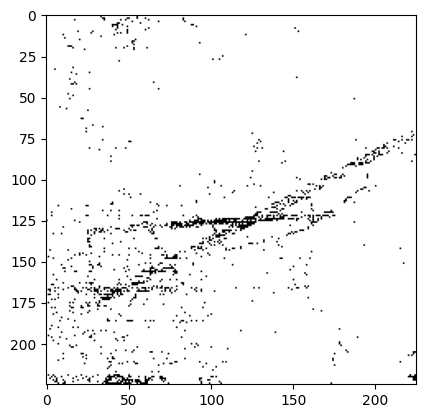

In [27]:
plt.imshow(bin_img, cmap="gray")

In [28]:
# бинаризация отсу

In [29]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

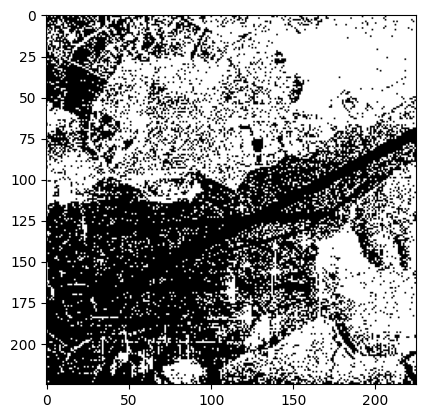

In [30]:
plt.imshow(th2, cmap="gray")

In [31]:
# адаптивная бинаризация

In [32]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,21)
th31 = cv2.adaptiveThreshold(eq_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,45)

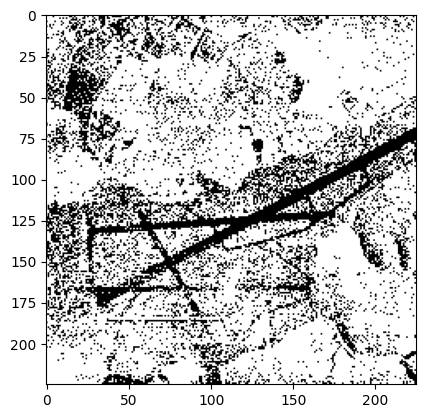

In [33]:
plt.imshow(th31, cmap="gray")

In [34]:
# выделение дороги, подсчёт протяженности (длины отрезков)

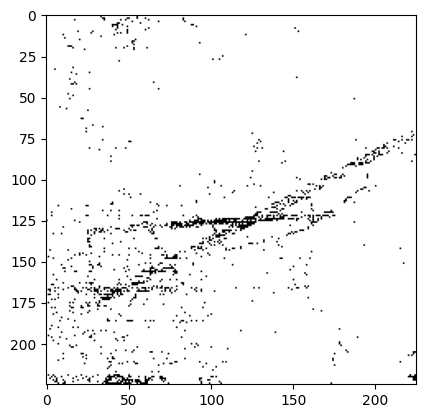

In [35]:
plt.imshow(bin_img, cmap="gray")

In [36]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
eq_gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [44]:
edges = cv2.Canny(bin_img,0,1,apertureSize = 3)
minLineLength = 10
tlines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap=8)

maxum = 0
max_line = None

for i in range(len(tlines)):
    x1 = tlines[i][0][0]
    y1 = tlines[i][0][1]
    x2 = tlines[i][0][2]
    y2 = tlines[i][0][3]
    tlen = np.sqrt((x2-x1)**2+(y2-y1)**2)
    if (tlen > maxum):
        maxum = tlen
        max_line = (x1, y1, x2, y2)

if max_line is not None:
    x1, y1, x2, y2 = max_line
    cv2.line(image,(x1,y1),(x2,y2),(255,255,0),1)

print(maxum)

241.11822826157297


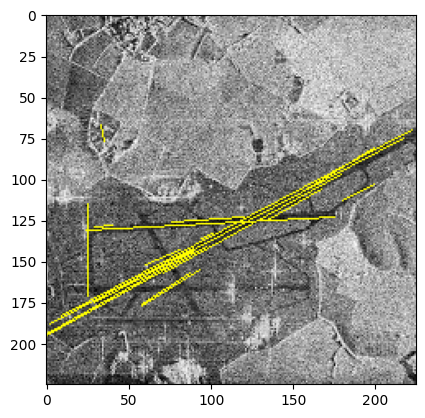

In [38]:
plt.imshow(image, cmap="gray")

In [39]:
image1 = cv2.imread('sar_3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR) 
eq_gray1 = cv2.equalizeHist(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)) 
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 

In [40]:
import copy

bin_img1 = copy.deepcopy(eq_gray1)
T  = 16
bin_img1[eq_gray1 < T] = 0
bin_img1[eq_gray1 >= T] = 255

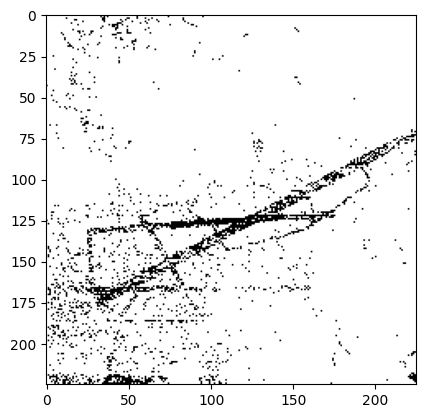

In [41]:
plt.imshow(bin_img1, cmap="gray")

In [45]:
edges1 = cv2.Canny(bin_img1,0,1,apertureSize = 5)
minLineLength1 = 10
tlines1 = cv2.HoughLinesP(edges1,1,np.pi/180,100,minLineLength,maxLineGap=10)

maxum1 = 0
max_line1 = None

for i in range(len(tlines1)):
    x1 = tlines1[i][0][0]
    y1 = tlines1[i][0][1]
    x2 = tlines1[i][0][2]
    y2 = tlines1[i][0][3]
    tlen = np.sqrt((x2-x1)**2+(y2-y1)**2)
    if (tlen > maxum1):
        maxum1 = tlen
        max_line1 = (x1, y1, x2, y2)

if max_line1 is not None:
    x1, y1, x2, y2 = max_line1
    cv2.line(image1,(x1,y1),(x2,y2),(255,255,0),1)

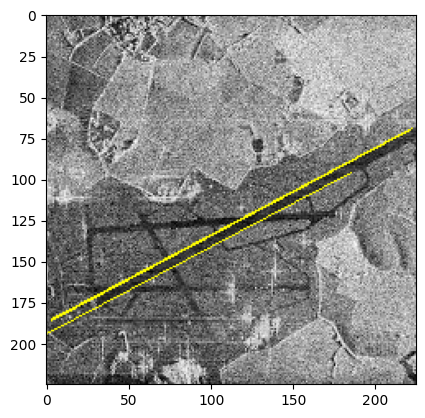

In [46]:
plt.imshow(image1, cmap="gray")

In [48]:
# Визуализировал участок дорожной полосы.